In [ ]:
# Notebook criado para o desenvolvimento de gráficos do ativo PETR3
#
# Objetivo: Conexao com o MetaTrader 5, e criar gráficos para o ativo PETR3
#           para o desenvolvimento de estratégias de trading.

In [1]:
# Lendo as bibliotecas necessarias
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Conectando ao MetaTrader 5
# Utilizando os logins atuais do Software
if not mt5.initialize():
    print("initialize() falhou")
    mt5.shutdown()
# Consultamos o estado e os parâmetros de conexão
print(mt5.terminal_info())
# Obtemos informações sobre a versão do MetaTrader 5
print(mt5.version())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=True, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=True, mqid=True, build=3300, maxbars=100000, codepage=1252, ping_last=71962, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5', ...)
(500, 3300, '20 May 2022')


In [5]:
# Simbolo selecionado para grafico
simbolo = "PETR3"

In [7]:
# Obtendo as informacoes do ativo de tamanho 1000, considerando a data de hoje e o Timframe de H1 = 1 hora;
ValoresAtivo = mt5.copy_rates_from_pos(simbolo, mt5.TIMEFRAME_H1, 0, 1000)
ValoresAtivo_PD = pd.DataFrame(ValoresAtivo) # Conversao em pandas
ValoresAtivo_PD['time'] = pd.to_datetime(ValoresAtivo_PD['time'], unit='s')

In [8]:
# Verificando um o tail() dos valores
ValoresAtivo_PD.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
995,2022-05-23 13:00:00,38.59,38.65,38.47,38.65,4395,1,1463900
996,2022-05-23 14:00:00,38.65,38.86,38.55,38.83,4612,1,1978500
997,2022-05-23 15:00:00,38.85,39.11,38.81,39.07,4654,1,2693000
998,2022-05-23 16:00:00,39.07,39.28,39.06,39.19,5717,1,3151000
999,2022-05-23 17:00:00,39.06,39.25,39.05,39.25,313,0,1677300


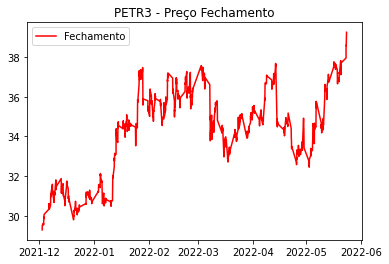

In [9]:
# Gerando o gráfico
plt.plot(ValoresAtivo_PD['time'], ValoresAtivo_PD['close'], 'r-', label='Fechamento')
 
# exibimos rótulos
plt.legend(loc='upper left')
 
# adicionamos cabeçalho
plt.title('PETR3 - Preço Fechamento')
 
# mostramos o gráfico
plt.show()

In [55]:
# Solicitando os Ticks diario do PETR3
ValoresAtivosTicks = mt5.copy_ticks_from(simbolo, datetime(2022,5,23,10), 30000, mt5.COPY_TICKS_ALL)

In [56]:
# Convertendo em pandas e em as datas em formato datetime
ValoresAtivosTicks_PD = pd.DataFrame(ValoresAtivosTicks)
ValoresAtivosTicks_PD['time']=pd.to_datetime(ValoresAtivosTicks_PD['time'], unit='s')

In [57]:
# Verificando um o tail() dos valores
ValoresAtivosTicks_PD.tail()

,time,bid,ask,last,volume,time_msc,flags,volume_real
26734,2022-05-23 17:59:48,39.10,39.28,39.25,800,1653328788650,2,800.0
26735,2022-05-23 17:59:53,39.11,39.28,39.25,800,1653328793967,2,800.0
26736,2022-05-23 17:59:55,39.11,39.27,39.25,800,1653328795492,4,800.0
26737,2022-05-23 18:30:00,39.11,39.27,39.25,800,1653330600450,6,800.0
26738,2022-05-23 18:33:25,39.11,39.27,39.25,800,1653330805310,6,800.0


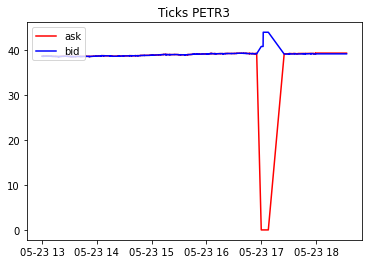

In [58]:
# Gerando o gráfico
plt.plot(ValoresAtivosTicks_PD['time'], ValoresAtivosTicks_PD['ask'], 'r-', label='ask')
plt.plot(ValoresAtivosTicks_PD['time'], ValoresAtivosTicks_PD['bid'], 'b-', label='bid')
 
# exibimos rótulos
plt.legend(loc='upper left')
 
# adicionamos cabeçalho
plt.title('Ticks PETR3')
 
# mostramos o gráfico
plt.show()